In [3]:
gInterpreter->AddIncludePath("/usr/local/include");
gSystem->Load("/usr/local/lib/libErrorAnalysis");
gSystem->Load("/usr/local/lib/libLabTools");

In [4]:
#include"LabPlot.h"

In [5]:
is_base_of<TGraph, TGraphErrors>::value

(const bool) true


In [4]:
set_atlas_style(15)

Applying ATLAS style settings


In [5]:
#include"Logger.h"
using namespace Logger;

In [6]:
fprintf(stderr, "%s", error("test"));
fprintf(stderr, "%s", Logger::warning("System_t option not recognised"));


error: test


In [ ]:
TCanvas *c1 = new TCanvas("", "", 800, 1000);
c1->Divide(1,2);
ROOT::RDataFrame df("Events", "root://eospublic.cern.ch//eos/root-eos/cms_opendata_2012_nanoaod/Run2012C_DoubleMuParked.root");    

df.GetColumnNames()
    

In [ ]:
auto df_2mu = df.Filter("nMuon == 3", "Events with exactly two muons");
auto df_os = df_2mu.Filter("Muon_charge[0] == Muon_charge[1]", "Muons with opposite charge");

In [ ]:
using Vec_t = const ROOT::VecOps::RVec<float> &;
auto compute_mass = [](Vec_t pt, Vec_t eta, Vec_t phi, Vec_t mass) {
    ROOT::Math::PtEtaPhiMVector p1(pt[0], eta[0], phi[0], mass[0]);
    ROOT::Math::PtEtaPhiMVector p2(pt[1], eta[1], phi[1], mass[1]);
    return (p1 + p2).mass();
};
auto df_mass = df_os.Define("Dimuon_mass", compute_mass, {"Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass"});

In [ ]:
auto df_range = df_mass.Range(100000);


In [ ]:
const auto nbins = 30000;
const auto low = 100;
const auto up = 300;
auto h = df_range.Histo1D({"Dimuon_mass", "Dimuon_mass", nbins, low, up}, "Dimuon_mass");

auto h2 = df_2mu.Histo1D("nMuon");

In [5]:
#include"Bode/Analysis.h"

In [3]:
Bode plot("test");

input_line_48:2:6: error: expected ';' after expression
 Bode plot("test");
     ^
     ;
input_line_48:2:7: error: use of undeclared identifier 'plot'
 Bode plot("test");
      ^


In [9]:
%jsroot off
c1->cd(1);
h->Draw("hist");
h->SetTitle(";m_{#mu#mu} (GeV);N_{Events}");
c1->cd(2);
h2->Draw("hist");
c1->Draw();

input_line_56:2:3: error: use of undeclared identifier 'c1'
 (c1->cd(1))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (c1->cd(1)).
Execution of your code was aborted.


In [15]:
UInt_t Hash_t(std::string key){
    UInt_t hashCode = 0;
    const Int_t PRIME_CONST = 31;
    Int_t keyLenght = key.length();
    for (int i = 0; i < keyLenght; i++) {
        hashCode += (Int_t)key[i] * pow(PRIME_CONST, i);
    }
    return hashCode;
} // hashing

In [21]:


std::cout <<
Hash_t("OP_AMP_HP") << "\n" <<
Hash_t("OP_AMP_LP") << "\n" <<
Hash_t("RLC_HP") << "\n" <<
Hash_t("RLC_LP") << "\n" <<
Hash_t("RLC_BP") << "\n" <<
Hash_t("op_amp_hp") << "\n" <<
Hash_t("op_amp_lp") << "\n" <<
Hash_t("rlc_hp") << "\n" <<
Hash_t("rlc_lp") << "\n" <<
Hash_t("rlc_bp") << "\n" << std::endl;

3137800801
1519107549
2359722562
2363416646
2354181436
2015828545
397135293
3305439842
3309133926
3299898716



In [22]:
TString OP_AMP_HP = "OP_AMP_HP";
TString OP_AMP_LP = "OP_AMP_LP";
TString RLC_HP    = "RLC_HP";
TString RLC_LP    = "RLC_LP";
TString RLC_BP    = "RLC_BP";
TString op_amp_hp = "op_amp_hp";
TString op_amp_lp = "op_amp_lp";
TString rlc_hp    = "rlc_hp";
TString rlc_lp    = "rlc_lp";
TString rlc_bp    = "rlc_bp";

std::cout <<
OP_AMP_HP.Hash() << "\n" <<
OP_AMP_LP.Hash() << "\n" <<
RLC_HP.Hash() << "\n" <<
RLC_LP.Hash() << "\n" <<
RLC_BP.Hash() << "\n" <<
op_amp_hp.Hash() << "\n" <<
op_amp_lp.Hash() << "\n" <<
rlc_hp.Hash() << "\n" <<
rlc_lp.Hash() << "\n" <<
rlc_bp.Hash() << "\n" << std::endl;

1991226620
4138710268
3899251227
3899252251
3899248667
1982541912
4130025560
3966631483
3966630459
3966628923



In [23]:
op_amp_hp.Data()
    

(const char *) "op_amp_hp"


In [1]:
gInterpreter->AddIncludePath("/usr/local/include");
gSystem->Load("/usr/local/lib/libErrorAnalysis");
gSystem->Load("/usr/local/lib/libLabTools");

In [2]:
#include"LabPlot.h"

In [3]:
set_atlas_style(29, false)

Applying ATLAS style settings


In [4]:
TGraphErrors v("/Users/massimosotgia/Desktop/uni_at_DIFI/Lab1_C03/esperienza_1__Massa_Volume_Densita_Solido/dati/sotgia/dati_C03_201116_presa_dati1_analisi_v.txt");

v.SetTitle("");
v.SetLineColor(kBlack);
v.GetYaxis()->SetTitle("Volume (mm^{3})");

TAxis *vx = v.GetXaxis();
vx->SetLimits(0, 5.);

TGraphErrors ro("/Users/massimosotgia/Desktop/uni_at_DIFI/Lab1_C03/esperienza_1__Massa_Volume_Densita_Solido/dati/sotgia/dati_C03_201116_presa_dati1_analisi_ro.txt");
ro.SetLineColor(kRed);
ro.SetFillColor(kRed);
ro.SetMarkerColor(kRed);

TCanvas c1("c1", "v_ro_disc", 900, 700);
TPad *p1 = new TPad("p1", "",  0, 0, 1, 1);
TPad *p2 = new TPad("p2", "", 0, 0, 1, 1);
p2->SetFillStyle(4000);

p1->Draw();
p1->cd();

v.Draw("ap");
gPad->Update();


Double_t xmin = p1->GetUxmin();
Double_t xmax = p1->GetUxmax();
Double_t dx = (xmax - xmin) / 0.68; // 10 percent margins left and right
Double_t ymin = ro.GetHistogram()->GetMinimum();
Double_t ymax = ro.GetHistogram()->GetMaximum();
Double_t dy = (ymax - ymin) / 0.79; // 10 percent margins top and bottom
p2->Range(xmin-0.16*dx, ymin-0.16*dy, xmax+0.16*dx, ymax+0.05*dy);

p2->Draw();
p2->cd();
ro.Draw("P");
gPad->Update();

Style_t tfont = v.GetHistogram()->GetYaxis()->GetTitleFont();
Float_t tsize = v.GetHistogram()->GetYaxis()->GetTitleSize();
Style_t lfont = v.GetHistogram()->GetYaxis()->GetLabelFont();
Float_t lsize = v.GetHistogram()->GetYaxis()->GetLabelSize();
  
TGaxis *axis = new TGaxis(xmax, ymin, xmax, ymax, ymin, ymax, 510, "+L");
axis->SetTitle("#rho(g/mm^{3})");
axis->SetTitleOffset(1.5);
axis->SetTitleFont(tfont);
axis->SetTitleSize(tsize);
axis->SetLabelFont(lfont);
axis->SetLabelSize(lsize);
axis->SetMaxDigits(1);
axis->Draw();
gPad->Update();

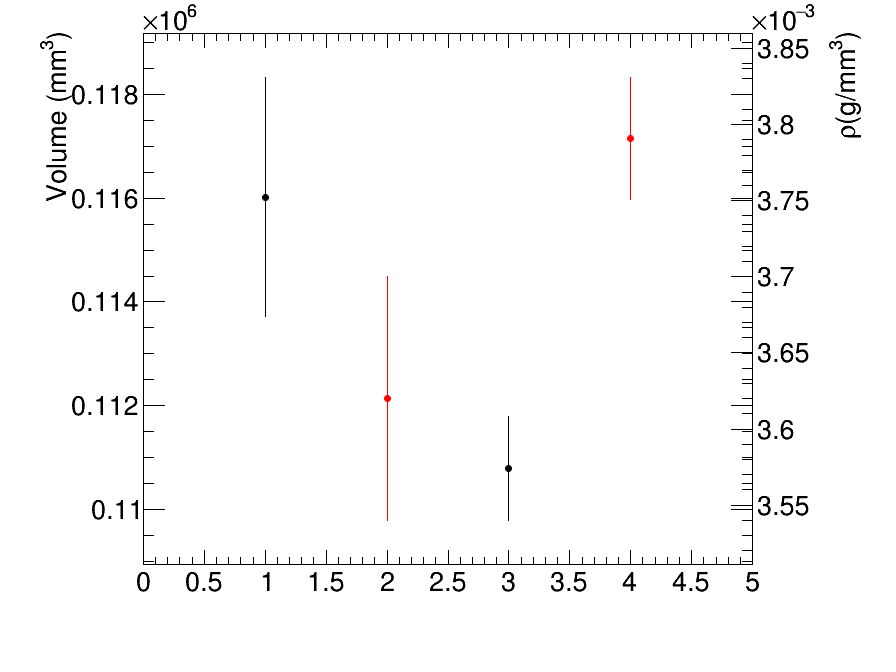

In [5]:


c1.Draw()

In [7]:

p1->GetUxmax()

(double) 5.0000000


In [8]:
c1.SaveAs("test.pdf")

Info in <TCanvas::Print>: pdf file test.pdf has been created
